# Descriptive Analysis

## Potential steps: Descriptive Analysis

1. Patient Demographics
    - Age distribution
    - Gender breakdown
    - Ethnicity composition
    - Geographic distribution

2. Clinical Characteristics
    - Disease prevalence
    - Comorbidities
    - Clinical measurements
    - Laboratory values

4. Subgroup Analysis
    - Treatment groups
    - Disease severity
    - Risk factors

6. Statistical Summaries
    - Measures of central tendency
    - Measures of variability
    - Frequency distributions
    - Cross-tabulations

7. Visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Visualization possible predictors

In [2]:
chest_tube_df = pd.read_excel('../data/full_data_chest_tube_prediction.xlsx')

In [3]:
to_factor = ['Y_ICD_S22_41', 'Y_ICD_S22_42', 'Y_ICD_S22_43', 'Y_ICD_S22_44', 'Y_ICD_S22_5', 'Y_ICD_S27_0', 'Y_ICD_S27_1', 'Y_ICD_S27_2',
             'X_gender', 'P_chest_tube', 'P_chest_tube_side', 'P_chest_tube_indication_right', 'P_chest_tube_indication_left', 'X_max_AIS_head', 
             'X_max_AIS_face', 'X_max_AIS_throat', 'X_max_AIS_thorax', 'X_max_AIS_abdomen', 'X_max_AIS_pelvis', 'X_max_AIS_spine', 'X_max_AIS_upper_limb', 
             'X_max_AIS_lower_limb', 'X_max_AIS_soft_tissue', 'X_broken_ribs_6plus', 'X_bilaterial_rib_fractures', 'X_flail_chest', 'X_dislogged_ribs_3plus', 
             'X_fracture_first_rib', 'X_rib_fracture_every_region', 'X_Horowitz_quotient', 'X_num_broken_ribs', 'X_lungcontusion', 'X_pleural_involvement', 
             'X_PTX_side', 'X_PTX_size_right', 'X_PTX_size_left', 'X_soft_tissue_emphysema', 'X_HTX_side', 'X_HTX_size_right', 'X_HTX_size_left', 'X_RibScore',
             'X_ASA', 'X_pulmonary_circulation_disease', 'X_heart_insufficiency', 'X_diabetes', 'X_Renal_insufficiency', 'X_chronic_lung_disease', 'X_obesity',
             'X_age_grouped']

chest_tube_df = chest_tube_df[chest_tube_df['P_chest_tube'].isin(['yes', 'no'])]
chest_tube_df[to_factor] = chest_tube_df[to_factor].astype('category')

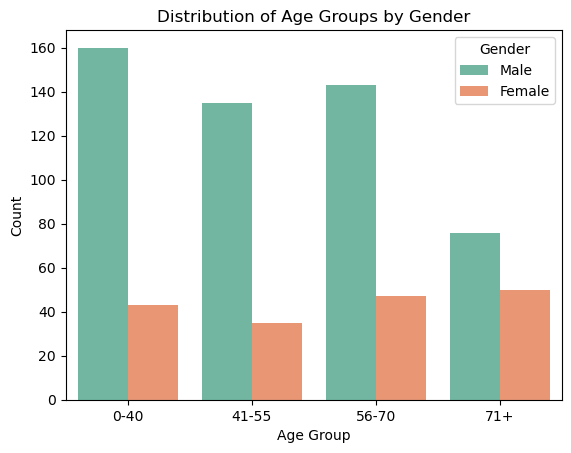

In [4]:
sns.countplot(data=chest_tube_df, x='X_age_grouped', hue='X_gender', palette='Set2')
age_group_labels = {'0_40': '0-40', '40_55': '41-55', '55_70': '56-70', '70_100': '71+'}
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups by Gender')
plt.xticks(ticks=range(len(age_group_labels)), labels=age_group_labels.values())
plt.savefig('age_distr.png', dpi=300, bbox_inches='tight')
plt.show()

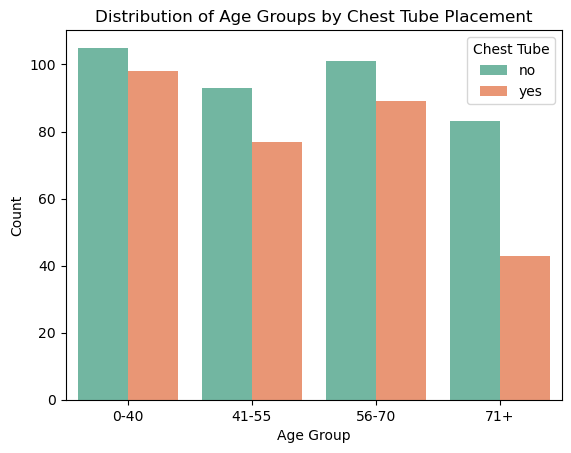

In [5]:
sns.countplot(data=chest_tube_df, x='X_age_grouped', hue='P_chest_tube', palette='Set2')
age_group_labels = {'0_40': '0-40', '40_55': '41-55', '55_70': '56-70', '70_100': '71+'}
plt.legend(title='Chest Tube')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups by Chest Tube Placement')
plt.xticks(ticks=range(len(age_group_labels)), labels=age_group_labels.values())
plt.savefig('age_vs_chest_tube.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\manue\AppData\Local\Temp\ipykernel_27004\1497492027.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=chest_tube_df, x='P_chest_tube', palette='Set2')


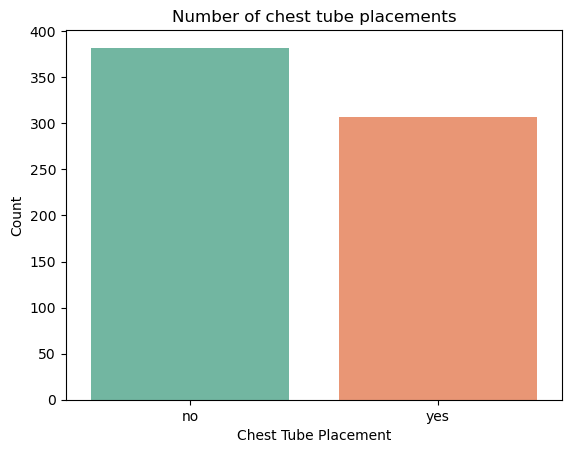

In [6]:
sns.countplot(data=chest_tube_df, x='P_chest_tube', palette='Set2')
plt.xlabel('Chest Tube Placement')
plt.ylabel('Count')
plt.title('Number of chest tube placements')
#plt.savefig('age_vs_chest_tube.png', dpi=300, bbox_inches='tight')
plt.show()

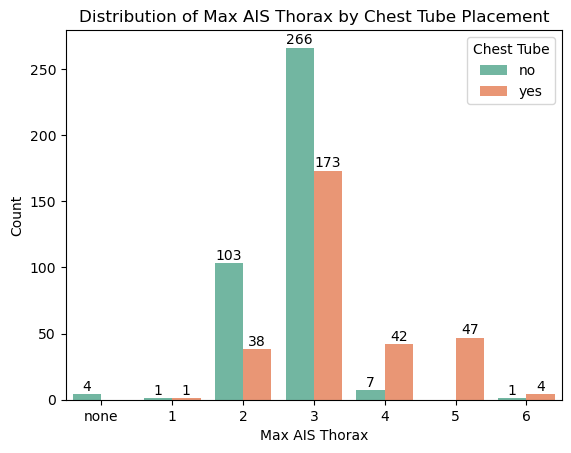

In [7]:
filtered_df = chest_tube_df[chest_tube_df['X_max_AIS_thorax'] != 'not_available'].copy()
if filtered_df['X_max_AIS_thorax'].dtype.name == 'category':
    filtered_df['X_max_AIS_thorax'] = filtered_df['X_max_AIS_thorax'].cat.remove_categories(['not_available'])

ax = sns.countplot(data=filtered_df, 
              x='X_max_AIS_thorax', 
              hue='P_chest_tube', 
              palette='Set2',
              order=['none', '1', '2', '3', '4', '5', '6'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,  # adjust 0.5 as needed for spacing
            int(height),
            ha='center',
            va='bottom',
            fontsize=10
        )
        
plt.legend(title='Chest Tube')
plt.xlabel('Max AIS Thorax')
plt.ylabel('Count')
plt.title('Distribution of Max AIS Thorax by Chest Tube Placement')
plt.savefig('max_AIS_thorax.png', dpi=300, bbox_inches='tight')
plt.show()

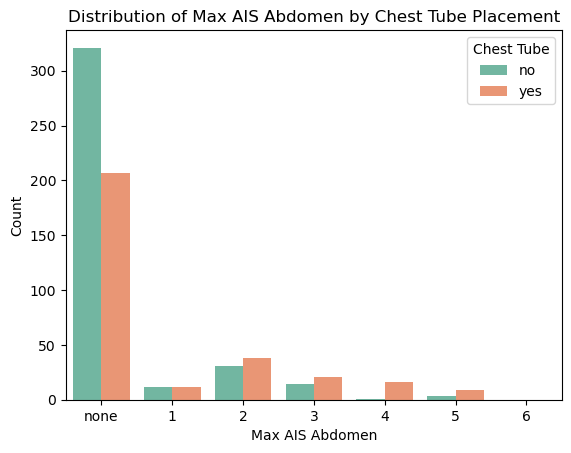

In [8]:
filtered_df = chest_tube_df[chest_tube_df['X_max_AIS_abdomen'] != 'not_available'].copy()
if filtered_df['X_max_AIS_abdomen'].dtype.name == 'category':
    filtered_df['X_max_AIS_abdomen'] = filtered_df['X_max_AIS_abdomen'].cat.remove_categories(['not_available'])

sns.countplot(data=filtered_df, 
              x='X_max_AIS_abdomen', 
              hue='P_chest_tube', 
              palette='Set2',
              order=['none', '1', '2', '3', '4', '5', '6'])
plt.legend(title='Chest Tube')
plt.xlabel('Max AIS Abdomen')
plt.ylabel('Count')
plt.title('Distribution of Max AIS Abdomen by Chest Tube Placement')
plt.show()

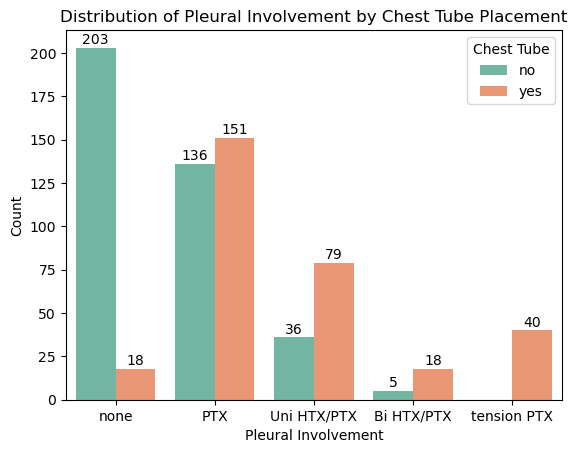

In [9]:
filtered_df = chest_tube_df[chest_tube_df['X_pleural_involvement'] != 'not_available'].copy()
if filtered_df['X_pleural_involvement'].dtype.name == 'category':
    filtered_df['X_pleural_involvement'] = filtered_df['X_pleural_involvement'].cat.remove_categories(['not_available'])

labels = {
    'none': 'none',
    'ptx': 'PTX',
    'unilateral_htx_ptx': 'Uni HTX/PTX',
    'bilateral_htx_ptx': 'Bi HTX/PTX',
    'tension_ptx': 'tension PTX'
}
order = list(labels.keys())
ax = sns.countplot(
    data=filtered_df, 
    x='X_pleural_involvement', 
    hue='P_chest_tube', 
    palette='Set2',
    order=order
)

plt.legend(title='Chest Tube')
plt.xlabel('Pleural Involvement')
plt.ylabel('Count')
plt.xticks(ticks=range(len(labels)), labels=labels.values())
plt.title('Distribution of Pleural Involvement by Chest Tube Placement')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,  # adjust 0.5 as needed for spacing
            int(height),
            ha='center',
            va='bottom',
            fontsize=10
        )
plt.savefig('ptx_htx.png', dpi=300, bbox_inches='tight')
plt.show()

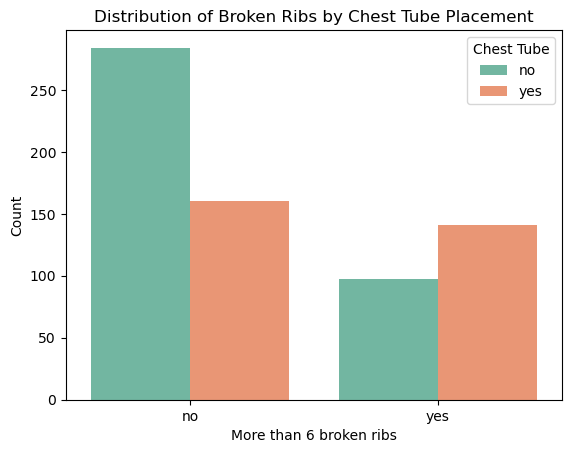

In [10]:
filtered_df = chest_tube_df[chest_tube_df['X_broken_ribs_6plus'] != 'not_available'].copy()
if filtered_df['X_broken_ribs_6plus'].dtype.name == 'category':
    filtered_df['X_broken_ribs_6plus'] = filtered_df['X_broken_ribs_6plus'].cat.remove_categories(['not_available'])

sns.countplot(data=filtered_df, 
              x='X_broken_ribs_6plus', 
              hue='P_chest_tube', 
              palette='Set2')
plt.legend(title='Chest Tube')
plt.xlabel('More than 6 broken ribs')
plt.ylabel('Count')
plt.title('Distribution of Broken Ribs by Chest Tube Placement')
plt.show()

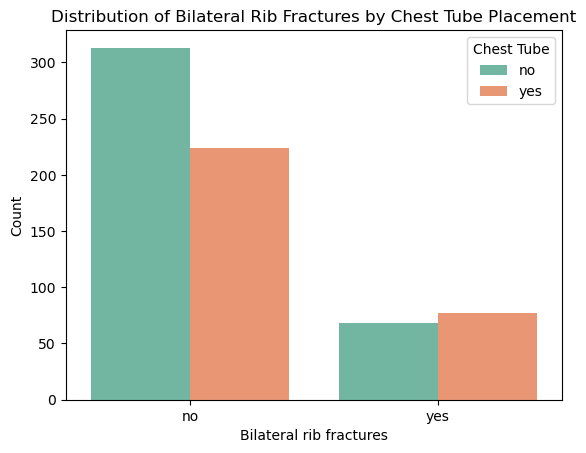

In [11]:
filtered_df = chest_tube_df[chest_tube_df['X_bilaterial_rib_fractures'] != 'not_available'].copy()
if filtered_df['X_bilaterial_rib_fractures'].dtype.name == 'category':
    filtered_df['X_bilaterial_rib_fractures'] = filtered_df['X_bilaterial_rib_fractures'].cat.remove_categories(['not_available'])

sns.countplot(data=filtered_df, 
              x='X_bilaterial_rib_fractures', 
              hue='P_chest_tube', 
              palette='Set2')       
plt.legend(title='Chest Tube')
plt.xlabel('Bilateral rib fractures')
plt.ylabel('Count')
plt.title('Distribution of Bilateral Rib Fractures by Chest Tube Placement')
plt.show()

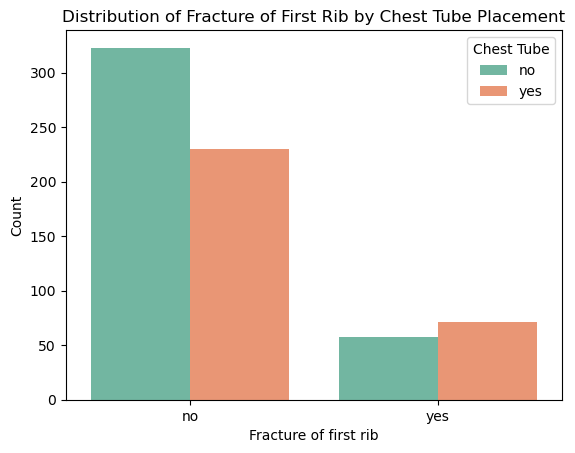

In [12]:
filtered_df = chest_tube_df[chest_tube_df['X_fracture_first_rib'] != 'not_available'].copy()
if filtered_df['X_fracture_first_rib'].dtype.name == 'category':
    filtered_df['X_fracture_first_rib'] = filtered_df['X_fracture_first_rib'].cat.remove_categories(['not_available'])

sns.countplot(data=filtered_df, 
              x='X_fracture_first_rib', 
              hue='P_chest_tube', 
              palette='Set2')       
plt.legend(title='Chest Tube')
plt.xlabel('Fracture of first rib')
plt.ylabel('Count')
plt.title('Distribution of Fracture of First Rib by Chest Tube Placement')
plt.show()

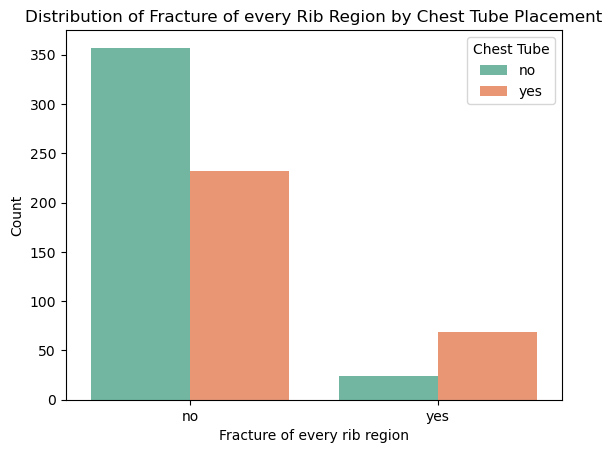

In [13]:
filtered_df = chest_tube_df[chest_tube_df['X_rib_fracture_every_region'] != 'not_available'].copy()
if filtered_df['X_rib_fracture_every_region'].dtype.name == 'category':
    filtered_df['X_rib_fracture_every_region'] = filtered_df['X_rib_fracture_every_region'].cat.remove_categories(['not_available'])

sns.countplot(data=filtered_df, 
              x='X_rib_fracture_every_region', 
              hue='P_chest_tube', 
              palette='Set2')       
plt.legend(title='Chest Tube')
plt.xlabel('Fracture of every rib region')
plt.ylabel('Count')
plt.title('Distribution of Fracture of every Rib Region by Chest Tube Placement')
plt.show()

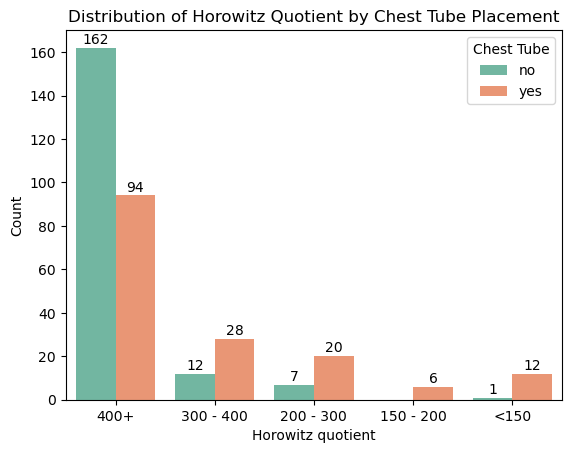

In [14]:
filtered_df = chest_tube_df[chest_tube_df['X_Horowitz_quotient'] != 'not_available'].copy()
if filtered_df['X_Horowitz_quotient'].dtype.name == 'category':
    filtered_df['X_Horowitz_quotient'] = filtered_df['X_Horowitz_quotient'].cat.remove_categories(['not_available'])

ax = sns.countplot(data=filtered_df, 
              x='X_Horowitz_quotient', 
              hue='P_chest_tube', 
              palette='Set2',
              order=['geq400', '300_400', '200_300', '150_200', 'leq150'])   
labels = {'geq400': '400+', '300_400': '300 - 400', '200_300': '200 - 300', '150_200': '150 - 200', 'leq150': '<150'}  

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,  # adjust 0.5 as needed for spacing
            int(height),
            ha='center',
            va='bottom',
            fontsize=10
        )
plt.legend(title='Chest Tube')
plt.xlabel('Horowitz quotient')
plt.xticks(ticks=range(len(labels)), labels=labels.values())
plt.ylabel('Count')
plt.title('Distribution of Horowitz Quotient by Chest Tube Placement')
plt.savefig('horowitz_quotient.png', dpi=300, bbox_inches='tight')
plt.show()

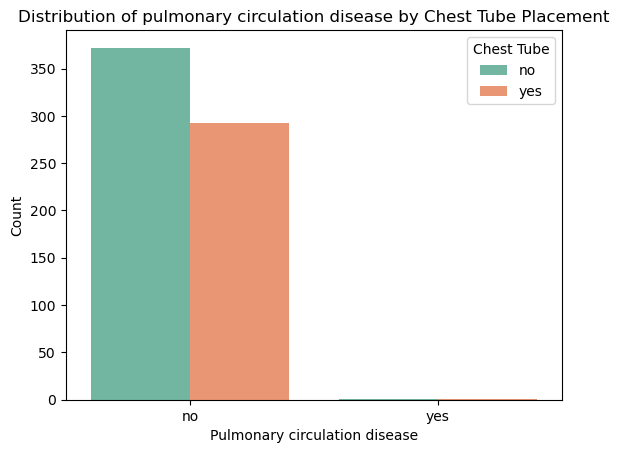

In [15]:
filtered_df = chest_tube_df[chest_tube_df['X_pulmonary_circulation_disease'] != 'not_available'].copy()
filtered_df.loc[filtered_df['X_pulmonary_circulation_disease'] == 'not_applicable', 'X_pulmonary_circulation_disease'] = 'no'

if filtered_df['X_pulmonary_circulation_disease'].dtype.name == 'category':
    filtered_df['X_pulmonary_circulation_disease'] = filtered_df['X_pulmonary_circulation_disease'].cat.remove_categories(['not_available'])
    filtered_df['X_pulmonary_circulation_disease'] = filtered_df['X_pulmonary_circulation_disease'].cat.remove_categories(['not_applicable'])

sns.countplot(data=filtered_df, 
              x='X_pulmonary_circulation_disease', 
              hue='P_chest_tube', 
              palette='Set2'
              )      
plt.legend(title='Chest Tube')
plt.xlabel('Pulmonary circulation disease')
plt.ylabel('Count')
plt.title('Distribution of pulmonary circulation disease by Chest Tube Placement')
plt.show()

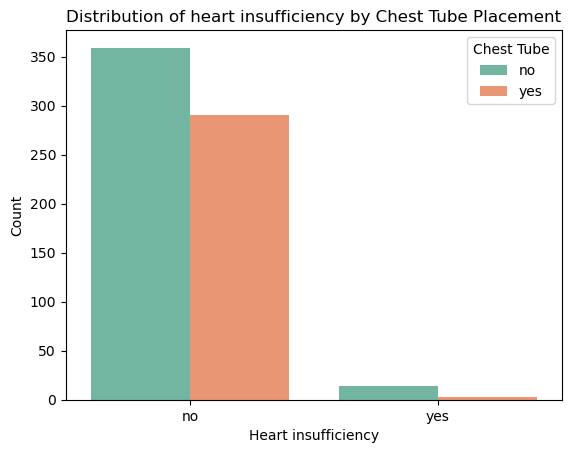

In [16]:
filtered_df = chest_tube_df[chest_tube_df['X_heart_insufficiency'] != 'not_available'].copy()
filtered_df.loc[filtered_df['X_heart_insufficiency'] == 'not_applicable', 'X_heart_insufficiency'] = 'no'

if filtered_df['X_heart_insufficiency'].dtype.name == 'category':
    filtered_df['X_heart_insufficiency'] = filtered_df['X_heart_insufficiency'].cat.remove_categories(['not_available'])
    filtered_df['X_heart_insufficiency'] = filtered_df['X_heart_insufficiency'].cat.remove_categories(['not_applicable'])

sns.countplot(data=filtered_df, 
              x='X_heart_insufficiency', 
              hue='P_chest_tube', 
              palette='Set2'
              )     
plt.legend(title='Chest Tube')
plt.xlabel('Heart insufficiency')
plt.ylabel('Count')
plt.title('Distribution of heart insufficiency by Chest Tube Placement')
plt.show()

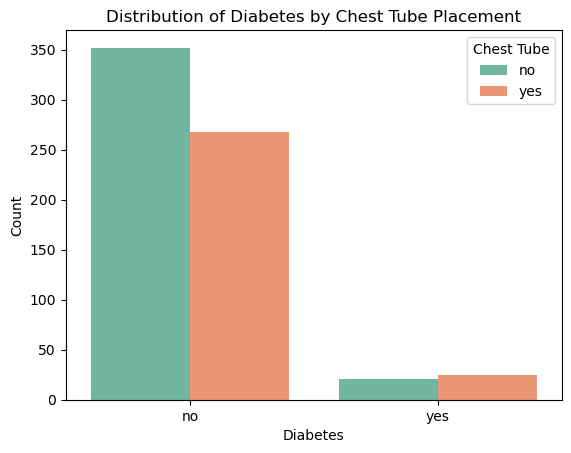

In [17]:
filtered_df = chest_tube_df[chest_tube_df['X_diabetes'] != 'not_available'].copy()

filtered_df['X_diabetes'] = filtered_df['X_diabetes'].cat.add_categories(['yes'])
filtered_df.loc[filtered_df['X_diabetes'] == 'not_applicable', 'X_diabetes'] = 'no'
filtered_df.loc[filtered_df['X_diabetes'] == 'Ja, ohne chronischen Komplikationen', 'X_diabetes'] = 'yes'
filtered_df.loc[filtered_df['X_diabetes'] == 'Ja, mit chronischen Komplikationen', 'X_diabetes'] = 'yes'
filtered_df['X_diabetes'] = filtered_df['X_diabetes'].cat.remove_categories(['not_available'])
filtered_df['X_diabetes'] = filtered_df['X_diabetes'].cat.remove_categories(['not_applicable'])
filtered_df['X_diabetes'] = filtered_df['X_diabetes'].cat.remove_categories(['Ja, ohne chronischen Komplikationen'])
filtered_df['X_diabetes'] = filtered_df['X_diabetes'].cat.remove_categories(['Ja, mit chronischen Komplikationen'])

sns.countplot(data=filtered_df, 
              x='X_diabetes', 
              hue='P_chest_tube', 
              palette='Set2'
              )     
plt.legend(title='Chest Tube')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes by Chest Tube Placement')
plt.show()

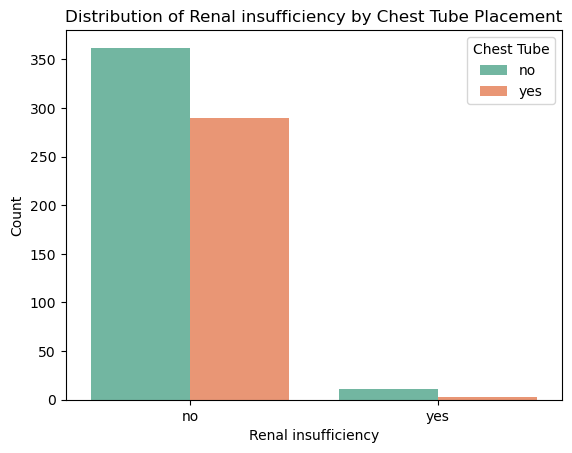

In [18]:
filtered_df = chest_tube_df[chest_tube_df['X_Renal_insufficiency'] != 'not_available'].copy()
filtered_df.loc[filtered_df['X_Renal_insufficiency'] == 'not_applicable', 'X_Renal_insufficiency'] = 'no'

if filtered_df['X_Renal_insufficiency'].dtype.name == 'category':
    filtered_df['X_Renal_insufficiency'] = filtered_df['X_Renal_insufficiency'].cat.remove_categories(['not_available'])
    filtered_df['X_Renal_insufficiency'] = filtered_df['X_Renal_insufficiency'].cat.remove_categories(['not_applicable'])

sns.countplot(data=filtered_df, 
              x='X_Renal_insufficiency', 
              hue='P_chest_tube', 
              palette='Set2'
              )     
plt.legend(title='Chest Tube')
plt.xlabel('Renal insufficiency')
plt.ylabel('Count')
plt.title('Distribution of Renal insufficiency by Chest Tube Placement')
plt.show()

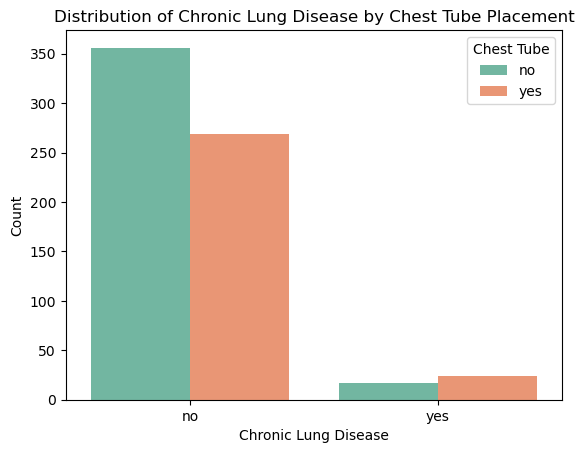

In [19]:
filtered_df = chest_tube_df[chest_tube_df['X_chronic_lung_disease'] != 'not_available'].copy()
filtered_df.loc[filtered_df['X_chronic_lung_disease'] == 'not_applicable', 'X_chronic_lung_disease'] = 'no'

if filtered_df['X_chronic_lung_disease'].dtype.name == 'category':
    filtered_df['X_chronic_lung_disease'] = filtered_df['X_chronic_lung_disease'].cat.remove_categories(['not_available'])
    filtered_df['X_chronic_lung_disease'] = filtered_df['X_chronic_lung_disease'].cat.remove_categories(['not_applicable'])

sns.countplot(data=filtered_df, 
              x='X_chronic_lung_disease', 
              hue='P_chest_tube', 
              palette='Set2'
              )     
plt.legend(title='Chest Tube')
plt.xlabel('Chronic Lung Disease')
plt.ylabel('Count')
plt.title('Distribution of Chronic Lung Disease by Chest Tube Placement')
plt.show()


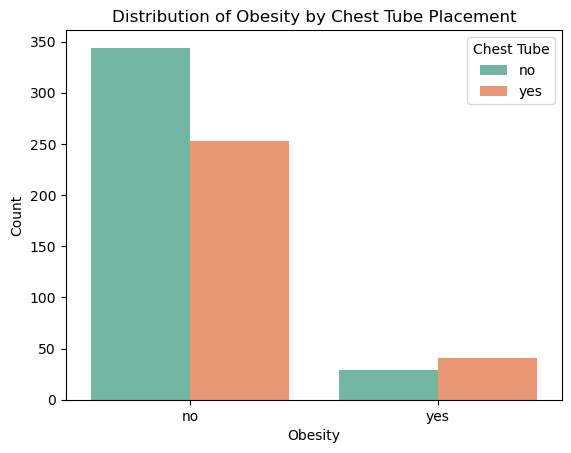

In [20]:
filtered_df = chest_tube_df[chest_tube_df['X_obesity'] != 'not_available'].copy()
filtered_df.loc[filtered_df['X_obesity'] == 'not_applicable', 'X_obesity'] = 'no'

if filtered_df['X_obesity'].dtype.name == 'category':
    filtered_df['X_obesity'] = filtered_df['X_obesity'].cat.remove_categories(['not_available'])
    filtered_df['X_obesity'] = filtered_df['X_obesity'].cat.remove_categories(['not_applicable'])

sns.countplot(data=filtered_df, 
              x='X_obesity', 
              hue='P_chest_tube', 
              palette='Set2'
              )     
plt.legend(title='Chest Tube')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.title('Distribution of Obesity by Chest Tube Placement')
plt.show()

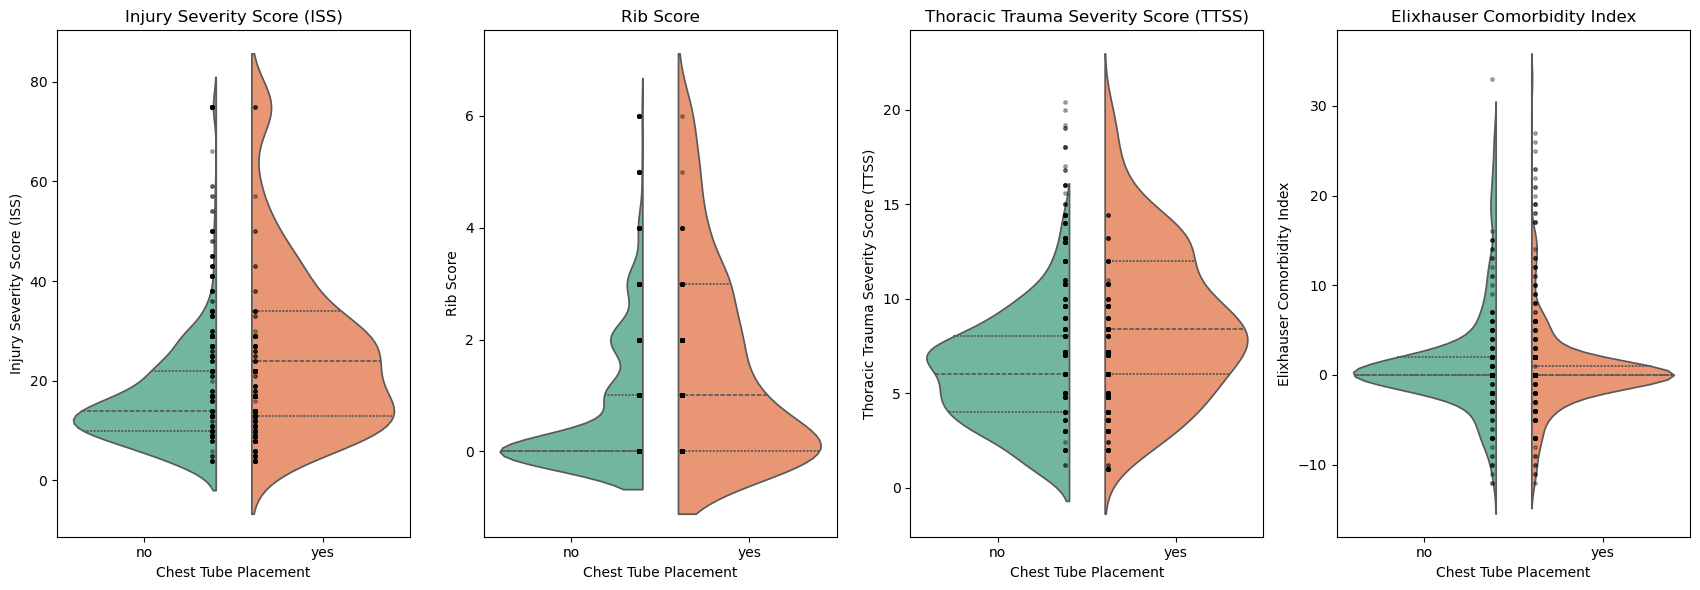

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(18, 6), sharey=False)

variables = ('X_ISS', 'X_RibScore', 'X_TTSS', 'X_Elixhauser')
y_labels = ('Injury Severity Score (ISS)', 'Rib Score', 'Thoracic Trauma Severity Score (TTSS)', 'Elixhauser Comorbidity Index')

for ax, var, ylabel in zip(axs, variables, y_labels):
    sns.violinplot(
        data=chest_tube_df,
        x='P_chest_tube',
        y=var,
        hue='P_chest_tube',
        split=True,
        palette='Set2',
        inner='quartile',
        ax=ax,
        legend=False,
    )

    # rugplot 
    categories = chest_tube_df['P_chest_tube'].unique()
    offsets = {-0.35, 0.35} 
    for i, cat in enumerate(categories):
        y = chest_tube_df.loc[chest_tube_df['P_chest_tube'] == cat, var]
        offset = -0.38 if i == 0 else 0.38
        # Add a small horizontal offset so the rug is just outside the violin
        ax.plot(
            np.full_like(y, i - offset),  
            y,
            '.',
            color='k',
            alpha=0.3,
            markersize=5,
            zorder=5
        )
    
    if var == 'X_RibScore':
        ax.invert_yaxis()
    ax.set_xlabel('Chest Tube Placement')
    ax.set_title(ylabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.grid(False)


plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('numeric_predictors.png', dpi=300, bbox_inches='tight')
plt.show()

## Outcome related visualization

In [22]:
full_df = pd.read_excel('../data/full_data_cleaned.xlsx')
to_factor = ['Y_ICD_S22_41', 'Y_ICD_S22_42', 'Y_ICD_S22_43', 'Y_ICD_S22_44', 'Y_ICD_S22_5', 'Y_ICD_S27_0', 'Y_ICD_S27_1', 'Y_ICD_S27_2',
             'X_gender', 'P_chest_tube', 'P_chest_tube_side', 'P_chest_tube_indication_right', 'P_chest_tube_indication_left', 'X_max_AIS_head', 
             'X_max_AIS_face', 'X_max_AIS_throat', 'X_max_AIS_thorax', 'X_max_AIS_abdomen', 'X_max_AIS_pelvis', 'X_max_AIS_spine', 'X_max_AIS_upper_limb', 
             'X_max_AIS_lower_limb', 'X_max_AIS_soft_tissue', 'X_broken_ribs_6plus', 'X_bilaterial_rib_fractures', 'X_flail_chest', 'X_dislogged_ribs_3plus', 
             'X_fracture_first_rib', 'X_rib_fracture_every_region', 'X_Horowitz_quotient', 'X_num_broken_ribs', 'X_lungcontusion', 'X_pleural_involvement', 
             'X_PTX_side', 'X_PTX_size_right', 'X_PTX_size_left', 'X_soft_tissue_emphysema', 'X_HTX_side', 'X_HTX_size_right', 'X_HTX_size_left', 'X_RibScore',
             'X_ASA', 'X_pulmonary_circulation_disease', 'X_heart_insufficiency', 'X_diabetes', 'X_Renal_insufficiency', 'X_chronic_lung_disease', 'X_obesity',
             'X_age_grouped']

full_df = full_df[full_df['P_chest_tube'].isin(['yes', 'no'])]
full_df[to_factor] = full_df[to_factor].astype('category')

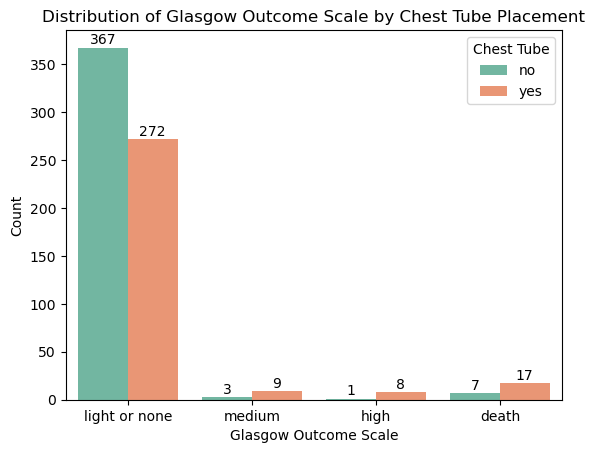

In [66]:
filtered_df = full_df[full_df['Y_glasgow_outcome_scale'] != 'not_available'].copy()

ax =sns.countplot(data=filtered_df, 
              x='Y_glasgow_outcome_scale', 
              hue='P_chest_tube', 
              palette='Set2',
              order=['light_or_none', 'medium', 'high', 'death'])     

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,  # adjust 0.5 as needed for spacing
            int(height),
            ha='center',
            va='bottom',
            fontsize=10
        )

labels = {'light_or_none': 'light or none', 'medium': 'medium', 'high': 'high', 'death': 'death'}
plt.legend(title='Chest Tube')
plt.xlabel('Glasgow Outcome Scale')
plt.xticks(ticks=range(len(labels)), labels=labels.values())
plt.ylabel('Count')
plt.title('Distribution of Glasgow Outcome Scale by Chest Tube Placement')
plt.savefig('glasgow_outcome_scale.png', dpi=300, bbox_inches='tight')
plt.show()

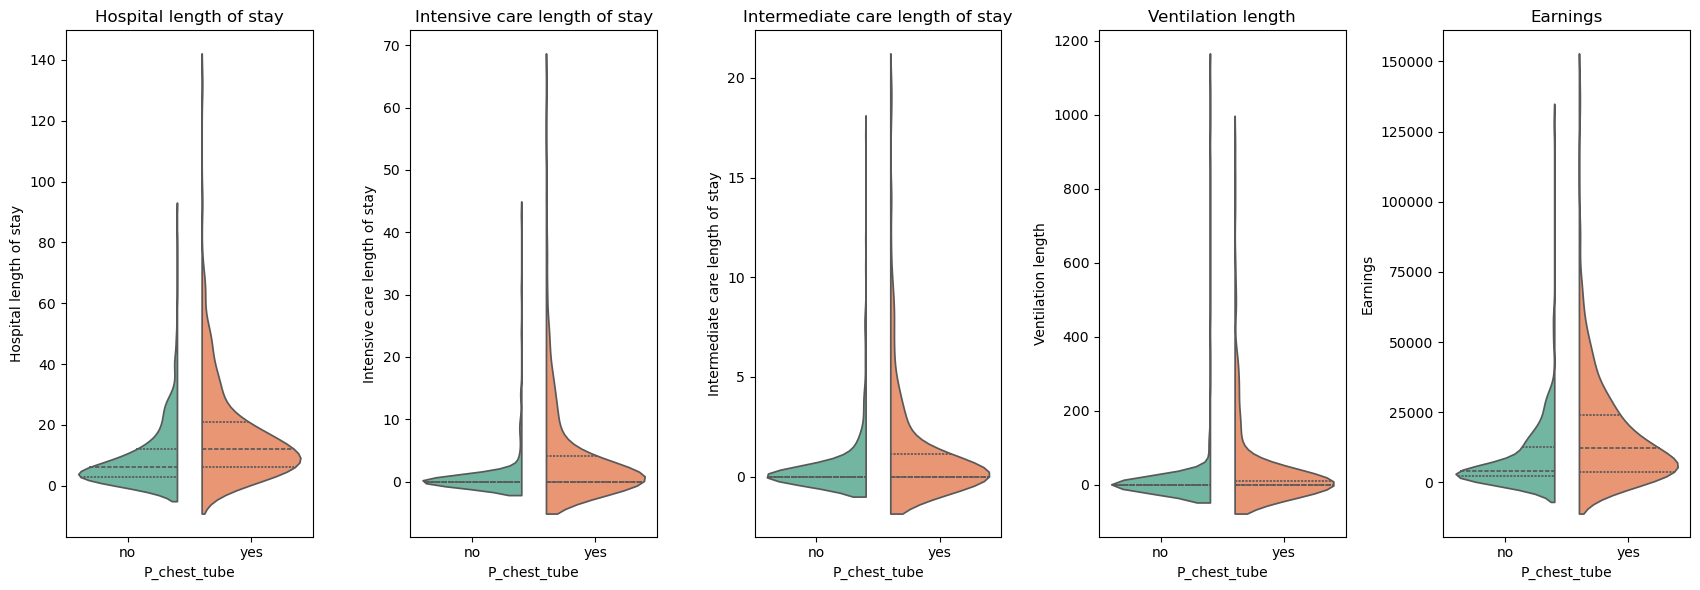

In [61]:
fig, axs = plt.subplots(1, 5, figsize=(18, 6), sharey=False)

variables = ('Y_HLOS', 'Y_ICU_LOS', 'Y_IMC_LOS', 'Y_ventilation_length', 'Y_earnings')
y_labels = ('Hospital length of stay', 'Intensive care length of stay', 'Intermediate care length of stay', 'Ventilation length', 'Earnings')

order = sorted(full_df['P_chest_tube'].unique())  # or specify your own order if needed

for ax, var, ylabel in zip(axs, variables, y_labels):
    sns.violinplot(
        data=full_df,
        x='P_chest_tube',
        y=var,
        hue='P_chest_tube',
        split=True,
        palette='Set2',
        inner='quartile',
        ax=ax,
        legend=False,
        order=order
    )
    ax.set_title(ylabel)
    ax.set_ylabel(ylabel)



plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('numeric_outcomes.png', dpi=300, bbox_inches='tight')
plt.show()